### Imports

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [77]:
df = pd.read_csv('../../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


####  Split

#####  Pre-split drop.

Dropping rows where the 'sqft_basement' has a value of '?'.

In [78]:
df = df[df.sqft_basement != '?']

Using price as a dependent variable. Assuming our stockholder is a real estate/brokerage company, TBD, who gets a commission on each sale or purchase. 

In [79]:
y = df["price"]
X = df.drop("price", axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15857 entries, 12998 to 16139
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15857 non-null  int64  
 1   date           15857 non-null  object 
 2   bedrooms       15857 non-null  int64  
 3   bathrooms      15857 non-null  float64
 4   sqft_living    15857 non-null  int64  
 5   sqft_lot       15857 non-null  int64  
 6   floors         15857 non-null  float64
 7   waterfront     14113 non-null  object 
 8   view           15806 non-null  object 
 9   condition      15857 non-null  object 
 10  grade          15857 non-null  object 
 11  sqft_above     15857 non-null  int64  
 12  sqft_basement  15857 non-null  object 
 13  yr_built       15857 non-null  int64  
 14  yr_renovated   13057 non-null  float64
 15  zipcode        15857 non-null  int64  
 16  lat            15857 non-null  float64
 17  long           15857 non-null  float64
 18  sq

#### Cleaning

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15857 entries, 12998 to 16139
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15857 non-null  int64  
 1   date           15857 non-null  object 
 2   bedrooms       15857 non-null  int64  
 3   bathrooms      15857 non-null  float64
 4   sqft_living    15857 non-null  int64  
 5   sqft_lot       15857 non-null  int64  
 6   floors         15857 non-null  float64
 7   waterfront     14113 non-null  object 
 8   view           15806 non-null  object 
 9   condition      15857 non-null  object 
 10  grade          15857 non-null  object 
 11  sqft_above     15857 non-null  int64  
 12  sqft_basement  15857 non-null  object 
 13  yr_built       15857 non-null  int64  
 14  yr_renovated   13057 non-null  float64
 15  zipcode        15857 non-null  int64  
 16  lat            15857 non-null  float64
 17  long           15857 non-null  float64
 18  sq

Dropping 'id' and 'date'. No use for them and we don't have enough data to use them. 

The column 'waterfront' is a binomial categorical variable. The columns 'view', 'condition', and 'grade' are categorical variables. They will need to be converted into a model-able formats. 

The column 'sqft_basement' is numerical in value, however, contains N/As in the form of '?'s. These need to be addressed, dropped or filled in, and converted to a model-able format.

In addition there may be interactions between columns like 'view' and 'waterfront' or any of the 'sqft's. 

In [82]:
X_train = X_train.drop(['id', 'date'], axis=1)

##### Waterfront

The column contains 1756 na's, 14,330 NO's and 111 Yes's. I'm assuming na's are NO's so I will be filling them in as such.

In [83]:
X_train['waterfront'].fillna('NO', inplace=True)

In [84]:
from sklearn.preprocessing import OrdinalEncoder

waterfront_train = X_train[['waterfront']]

encoder_waterfront = OrdinalEncoder()

encoder_waterfront.fit(waterfront_train)

encoder_waterfront.categories_[0]

waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

waterfront_encoded_train = waterfront_encoded_train.flatten()

X_train["waterfront"] = waterfront_encoded_train

X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12998,4,2.75,2950,5803,2.0,0.0,NONE,Average,9 Better,2950,0.0,2007,0.0,98028,47.7368,-122.231,2940,5803
13728,3,1.75,3520,12350,1.0,0.0,EXCELLENT,Good,8 Good,1530,1990.0,1960,0.0,98116,47.5837,-122.382,2140,7800
8854,4,2.75,2560,83200,1.0,0.0,NONE,Average,8 Good,1860,700.0,1980,0.0,98072,47.7511,-122.111,1990,38332
16477,3,2.50,2020,7800,1.0,0.0,NONE,Good,7 Average,1330,690.0,1958,0.0,98133,47.7368,-122.337,1870,7800
12753,2,1.00,1290,6528,1.5,0.0,NONE,Good,7 Average,1290,0.0,1941,NaN,98115,47.6940,-122.290,1670,5712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,4,2.50,3360,13636,2.0,0.0,NONE,Average,10 Very Good,3360,0.0,1987,0.0,98074,47.6373,-122.042,2980,10615
12213,5,3.25,3840,4800,3.0,0.0,GOOD,Average,10 Very Good,2750,1090.0,2008,NaN,98144,47.5929,-122.290,2060,4800
5491,2,1.75,1760,4400,1.0,0.0,NONE,Good,7 Average,880,880.0,1930,0.0,98103,47.6500,-122.340,1330,4180
876,3,2.00,1910,11576,1.0,0.0,NONE,Average,7 Average,1410,500.0,1978,0.0,98011,47.7356,-122.198,2040,8750


##### View

The column 'view' has 5 categories; NONE, AVERAGE, GOOD, FAIR, and EXCELLENT. 49 values are na's. I'm assuming na's are NONE so I will be filling them in as such.

In [85]:
X_train['view'].fillna("NONE", inplace=True)

In [86]:
X_train['view'].value_counts()

NONE         14293
AVERAGE        699
GOOD           373
FAIR           259
EXCELLENT      233
Name: view, dtype: int64

In [87]:
from sklearn.preprocessing import OneHotEncoder

view_train = X_train[["view"]]

ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

ohe.fit(view_train)

view_encoded_train = ohe.transform(view_train)

view_encoded_train = pd.DataFrame(
    view_encoded_train,
    columns=ohe.categories_[0],
    index=X_train.index
)

X_train.drop("view", axis=1, inplace=True)

# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, view_encoded_train], axis=1)

# Visually inspect X_train
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode,lat,long,sqft_living15,sqft_lot15,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
12998,4,2.75,2950,5803,2.0,0.0,Average,9 Better,2950,0.0,...,98028,47.7368,-122.231,2940,5803,0.0,0.0,0.0,0.0,1.0
13728,3,1.75,3520,12350,1.0,0.0,Good,8 Good,1530,1990.0,...,98116,47.5837,-122.382,2140,7800,0.0,1.0,0.0,0.0,0.0
8854,4,2.75,2560,83200,1.0,0.0,Average,8 Good,1860,700.0,...,98072,47.7511,-122.111,1990,38332,0.0,0.0,0.0,0.0,1.0
16477,3,2.50,2020,7800,1.0,0.0,Good,7 Average,1330,690.0,...,98133,47.7368,-122.337,1870,7800,0.0,0.0,0.0,0.0,1.0
12753,2,1.00,1290,6528,1.5,0.0,Good,7 Average,1290,0.0,...,98115,47.6940,-122.290,1670,5712,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,4,2.50,3360,13636,2.0,0.0,Average,10 Very Good,3360,0.0,...,98074,47.6373,-122.042,2980,10615,0.0,0.0,0.0,0.0,1.0
12213,5,3.25,3840,4800,3.0,0.0,Average,10 Very Good,2750,1090.0,...,98144,47.5929,-122.290,2060,4800,0.0,0.0,0.0,1.0,0.0
5491,2,1.75,1760,4400,1.0,0.0,Good,7 Average,880,880.0,...,98103,47.6500,-122.340,1330,4180,0.0,0.0,0.0,0.0,1.0
876,3,2.00,1910,11576,1.0,0.0,Average,7 Average,1410,500.0,...,98011,47.7356,-122.198,2040,8750,0.0,0.0,0.0,0.0,1.0


##### Condition

The column 'condition' has 5 categories; Average, Good, Very Good, Fair, and Poor. 

In [88]:
condition_train = X_train[["condition"]]

ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

ohe.fit(condition_train)

condition_encoded_train = ohe.transform(condition_train)

condition_encoded_train = pd.DataFrame(
    condition_encoded_train,
    columns=ohe.categories_[0],
    index=X_train.index
)

X_train.drop("condition", axis=1, inplace=True)

# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, condition_encoded_train], axis=1)

# Visually inspect X_train
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,...,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Average,Fair,Good,Poor,Very Good
12998,4,2.75,2950,5803,2.0,0.0,9 Better,2950,0.0,2007,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13728,3,1.75,3520,12350,1.0,0.0,8 Good,1530,1990.0,1960,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8854,4,2.75,2560,83200,1.0,0.0,8 Good,1860,700.0,1980,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
16477,3,2.50,2020,7800,1.0,0.0,7 Average,1330,690.0,1958,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12753,2,1.00,1290,6528,1.5,0.0,7 Average,1290,0.0,1941,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,4,2.50,3360,13636,2.0,0.0,10 Very Good,3360,0.0,1987,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
12213,5,3.25,3840,4800,3.0,0.0,10 Very Good,2750,1090.0,2008,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5491,2,1.75,1760,4400,1.0,0.0,7 Average,880,880.0,1930,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
876,3,2.00,1910,11576,1.0,0.0,7 Average,1410,500.0,1978,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


##### Grade

The column 'grade' has eleven categories; 13 Mansion, 12 Luxury, 11 Excellent, 10 Very Good, 9 Better, 8 Good, 7 Average, 6 Low Average, 5 Fair, 4 Low, and 3 Poor. Some of these categories have very few counts and may need to be dropped.

In [89]:
X_train['grade'].value_counts()

7 Average        6596
8 Good           4388
9 Better         1924
6 Low Average    1513
10 Very Good      850
11 Excellent      304
5 Fair            180
12 Luxury          69
4 Low              23
13 Mansion          9
3 Poor              1
Name: grade, dtype: int64

In [90]:
grade_train = X_train[["grade"]]

ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

ohe.fit(grade_train)

grade_encoded_train = ohe.transform(grade_train)

grade_encoded_train = pd.DataFrame(
    grade_encoded_train,
    columns=ohe.categories_[0],
    index=X_train.index
)

X_train.drop("grade", axis=1, inplace=True)

# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, grade_encoded_train], axis=1)

# Visually inspect X_train
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
12998,4,2.75,2950,5803,2.0,0.0,2950,0.0,2007,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13728,3,1.75,3520,12350,1.0,0.0,1530,1990.0,1960,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8854,4,2.75,2560,83200,1.0,0.0,1860,700.0,1980,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16477,3,2.50,2020,7800,1.0,0.0,1330,690.0,1958,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12753,2,1.00,1290,6528,1.5,0.0,1290,0.0,1941,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,4,2.50,3360,13636,2.0,0.0,3360,0.0,1987,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12213,5,3.25,3840,4800,3.0,0.0,2750,1090.0,2008,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5491,2,1.75,1760,4400,1.0,0.0,880,880.0,1930,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
876,3,2.00,1910,11576,1.0,0.0,1410,500.0,1978,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##### sqft_basement

The column 'sqft_basement' was numerical data with the exception of the na column as '?', which made the column an object type. We chose to drop these rows because it was only 340. We did so above, which made the column an integer type.

##### Removal of outliers

In [34]:
#this removes float/int outliers
#def remove_outlier(df):
#    for x in df:
#        q1 = df[x].quantile(0.25)
#        q3 = df[x].quantile(0.75)
#        iqr = q3-q1 #Interquartile range
#        fence_low  = q1-1.5*iqr
#        fence_high = q3+1.5*iqr
#        df = df.loc[(df[x] > fence_low) & (df[x] < fence_high)]
#    return df
#remove_outlier(df)

In [17]:
formula = 'price ~ C(grade)'
lm = ols(formula, grade_df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(grade),10.0,1.515506e+15,1.515506e+14,2338.238311,0.0
Residual,21586.0,1.399076e+15,6.481403e+10,NaN,NaN


#### Regression Analysis 

In [18]:
formula = 'price ~ sqft_living'
model = ols(formula=formula, data=df2).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:27:20   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
formula = 'price ~ bathrooms + sqft_living + sqft_above + sqft_living15 + bedrooms'
model = ols(formula=formula, data=df2).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     4576.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:27:20   Log-Likelihood:            -2.9959e+05
No. Observations:               21597   AIC:                         5.992e+05
Df Residuals:                   21591   BIC:                         5.992e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.164e+04   7768.298      2.786      0.005    6417.601    3.69e+04
bathrooms      1.029e+04   3510.278      2.931      0.003    3408.151    1.72e+04
sqft_living     303.8065      4.854     62.591      0.000     294.293     313.320
sqft_above      -44.2576      4.503     -9.828      0.000     -53.084     -35.431
sqft_living15    68.7710      3.993     17.225      0.000      60.945      76.597
bedrooms       -5.71e+04   2342.723    -24.371      0.000   -6.17e+04   -5.25e+04
==============================================================================
Omnibus:                    15124.553   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           613612.122
Skew:                           2.878   Prob(JB):                         0.00
Kurtosis:                      28.470   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Jarque-Bera (JB) is high, skewness and kurtosis need to be addressed. In addition the high Condition number indicates there may be multicollinearity. 

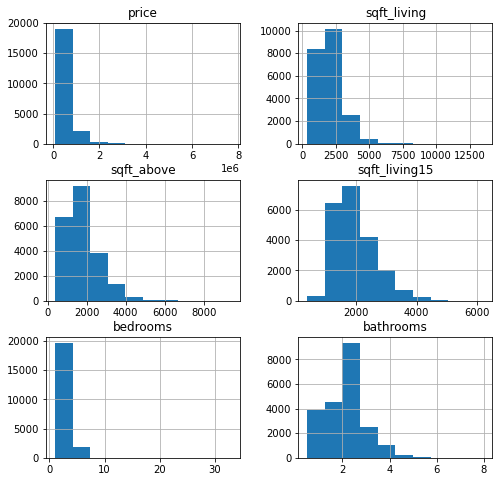

In [20]:
df2[['price', 'sqft_living', 'sqft_above', 'sqft_living15', 'bedrooms', 'bathrooms']].hist(figsize  = [8, 8]); 

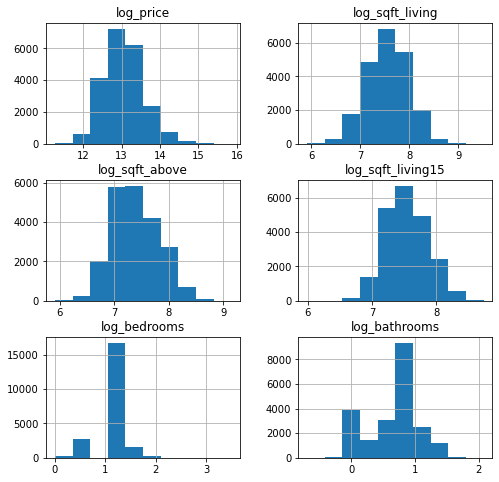

In [21]:
data_log = pd.DataFrame([])
data_log['log_price'] = np.log(df2['price'])
data_log['log_sqft_living'] = np.log(df2['sqft_living'])
data_log['log_sqft_above'] = np.log(df2['sqft_above'])
data_log['log_sqft_living15'] = np.log(df2['sqft_living15'])
data_log['log_bedrooms'] = np.log(df2['bedrooms'])
data_log['log_bathrooms'] = np.log(df2['bathrooms'])
data_log.hist(figsize  = [8, 8]);
#Create a function

In [22]:
formula = 'log_price ~ log_sqft_living'
model = ols(formula=formula, data=data_log).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:27:20   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7234      0.047    142.612      0.000       6.631       6.816
log_sqft_living     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
formula = 'log_price ~ log_sqft_living + log_sqft_above + log_sqft_living15 + log_bedrooms + log_bathrooms'
model = ols(formula=formula, data=data_log).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     4184.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:27:20   Log-Likelihood:                -9475.5
No. Observations:               21597   AIC:                         1.896e+04
Df Residuals:                   21591   BIC:                         1.901e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.2855      0.077     68.461      0.000       5.134       5.437
log_sqft_living       0.7816      0.015     50.742      0.000       0.751       0.812
log_sqft_above       -0.0760      0.012     -6.230      0.000      -0.100      -0.052
log_sqft_living15     0.3594      0.012     29.834      0.000       0.336       0.383
log_bedrooms         -0.2683      0.012    -22.419      0.000      -0.292      -0.245
log_bathrooms         0.0443      0.010      4.386      0.000       0.024       0.064
==============================================================================
Omnibus:                      111.872   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.650
Skew:                           0.125   Prob(JB):                     1.39e-22
Kurtosis:                       2.779   Cond. No.                         399.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
data_log.corr()

,log_price,log_sqft_living,log_sqft_above,log_sqft_living15,log_bedrooms,log_bathrooms
log_price,1.000000,0.674802,0.586013,0.607154,0.342850,0.520278
log_sqft_living,0.674802,1.000000,0.864979,0.746836,0.648121,0.760764
log_sqft_above,0.586013,0.864979,1.000000,0.713102,0.546713,0.683889
log_sqft_living15,0.607154,0.746836,0.713102,1.000000,0.425690,0.570469
log_bedrooms,0.342850,0.648121,0.546713,0.425690,1.000000,0.534008
log_bathrooms,0.520278,0.760764,0.683889,0.570469,0.534008,1.000000


In [25]:
predictors = data_log.drop(['log_price'], axis=1)
predictors = predictors.corr().abs().stack().reset_index().sort_values(0, ascending=False)
predictors

,level_0,level_1,0
0,log_sqft_living,log_sqft_living,1.000000
6,log_sqft_above,log_sqft_above,1.000000
18,log_bedrooms,log_bedrooms,1.000000
12,log_sqft_living15,log_sqft_living15,1.000000
24,log_bathrooms,log_bathrooms,1.000000
1,log_sqft_living,log_sqft_above,0.864979
5,log_sqft_above,log_sqft_living,0.864979
20,log_bathrooms,log_sqft_living,0.760764
4,log_sqft_living,log_bathrooms,0.760764
10,log_sqft_living15,log_sqft_living,0.746836


In [26]:
predictors['pairs'] = list(zip(predictors.level_0, predictors.level_1))
predictors.set_index(['pairs'], inplace = True)
predictors.drop(columns=['level_1', 'level_0'], inplace = True)

In [27]:
predictors.columns = ['cc']

In [28]:
predictors.drop_duplicates(inplace=True)
predictors[(predictors.cc>.5) & (predictors.cc <1)]

,cc
pairs,
"(log_sqft_living, log_sqft_above)",0.864979
"(log_bathrooms, log_sqft_living)",0.760764
"(log_sqft_living15, log_sqft_living)",0.746836
"(log_sqft_living15, log_sqft_above)",0.713102
"(log_sqft_above, log_bathrooms)",0.683889
"(log_bedrooms, log_sqft_living)",0.648121
"(log_bathrooms, log_sqft_living15)",0.570469
"(log_sqft_above, log_bedrooms)",0.546713
"(log_bedrooms, log_bathrooms)",0.534008


In [29]:
formula = 'log_price ~ log_sqft_living + log_sqft_above + log_sqft_living15 + log_bedrooms + log_bathrooms'
model = ols(formula=formula, data=data_log).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     4184.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:27:20   Log-Likelihood:                -9475.5
No. Observations:               21597   AIC:                         1.896e+04
Df Residuals:                   21591   BIC:                         1.901e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.2855      0.077     68.461      0.000       5.134       5.437
log_sqft_living       0.7816      0.015     50.742      0.000       0.751       0.812
log_sqft_above       -0.0760      0.012     -6.230      0.000      -0.100      -0.052
log_sqft_living15     0.3594      0.012     29.834      0.000       0.336       0.383
log_bedrooms         -0.2683      0.012    -22.419      0.000      -0.292      -0.245
log_bathrooms         0.0443      0.010      4.386      0.000       0.024       0.064
==============================================================================
Omnibus:                      111.872   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.650
Skew:                           0.125   Prob(JB):                     1.39e-22
Kurtosis:                       2.779   Cond. No.                         399.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""